# Importar dataset

In [1]:
!kaggle datasets download uciml/pima-indians-diabetes-database -p . --unzip

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0




  0%|          | 0.00/8.91k [00:00<?, ?B/s]
100%|██████████| 8.91k/8.91k [00:00<00:00, 9.13MB/s]


In [2]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Pretrarar dataset

### Nulos, y tipo de datos

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

El df no contiene nulos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todos los valores son numericos asi que no deberiamos tener ningun tipo de problema al tratar con ellos

### Visualizar columnas graficamente

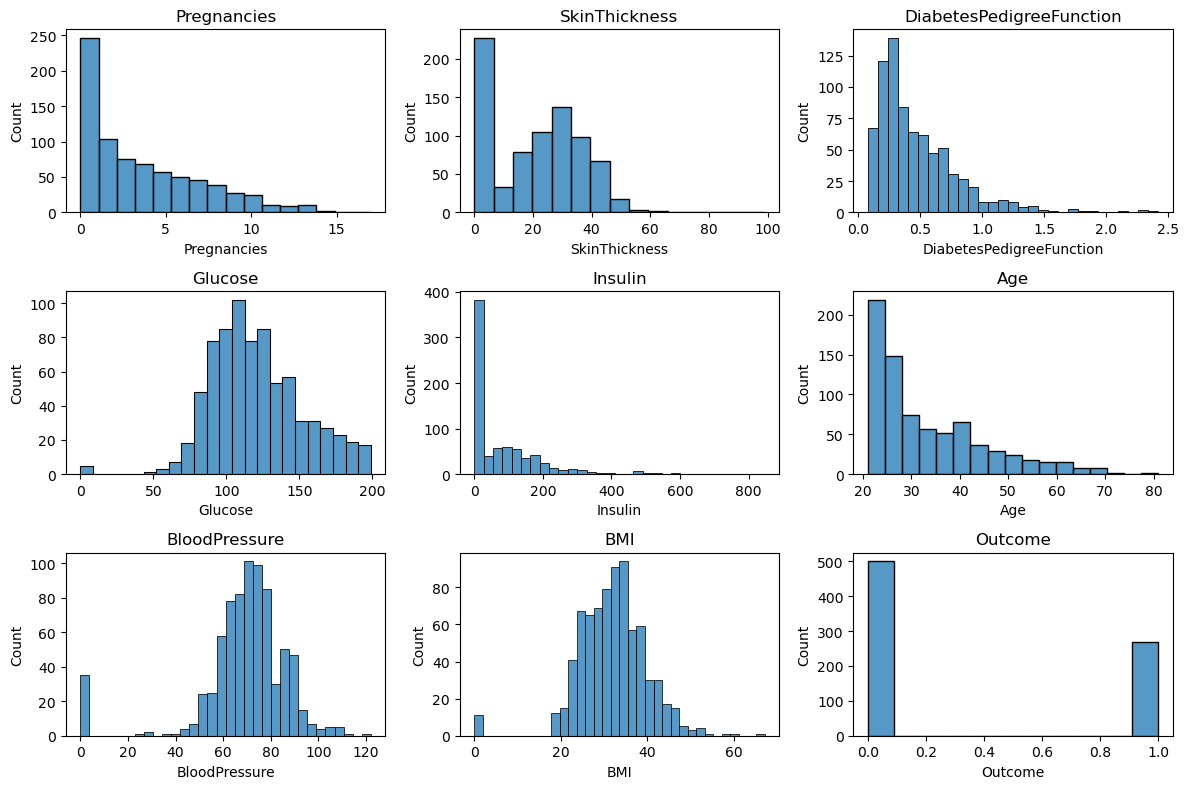

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# he decidido implementar esto para poder mostrar las graficas en cualquier df sin preocuparme cuantas columnas contiene y poder reutilizarlo en otros ejercicios
n_cols = len(df.columns)
if n_cols%3 == 0:
    cols = 3
elif n_cols%4 == 0:
    cols = 4
else:
    cols = 2


fig, axes = plt.subplots(cols, 3, figsize=(12, 8))

row = 0
column = 0

for i in df.columns:
    
    sns.histplot(df[i], ax=axes[row, column])
    axes[row, column].set_title(i)
    
    row = row + 1
    if row == 3:
        row = 0
        column = column + 1

plt.tight_layout() 
plt.show()    
    

# Mean Normalization
### Que es?
Mean Normalization centra los valores alrededor de 0 restando la media. Se utiliza para evitar que los valores grandes dominen el entrenamiento de modelos de ML

### Formula
    x' = x - μ / max(x) - min(x)

 - x' &rarr; valor normalizado
 - x &rarr; valor original
 - μ &rarr; media de la columna
 - max(x) y min(x) &rarr; valor maximo y minimo de la columna

### Cuando usar
 - Cuando los datos tienen escalas diferentes, pero no una distribución altamente sesgada
 - Cuando los valores estan en distintas magnitudes y es necesario estandarizarlos
 - Cuando se usa un algoritmo basado en distancias
 - En redes neuronales, para mejorar la convergencia y estabilidad del modelo

### Cuando **no** usar
 - Si los datos contienen valores atípicos, porque la media puede verse muy afectada
 - Si la distribucion de los datos es extremadamente sesgada, en estos casos
 - Si se trabaja con arboles de decision, ya que estos no dependen de la escala de los datos

### Ventajas y desventajas
#### <span style="color: green">Ventajas</span>
 - <span style="color: green">Reduce el impacto de las diferencias de escala en los datos</span>
 - <span style="color: green">Hace que los modelos converjan mas rapido en algoritmos de optimizacion como descenso de gradiente</span> [?]
 - <span style="color: green">Centra los datos alrededor de 0, lo que puede ser util en ciertos modelos estadisticos</span>
#### <span style="color: crimson">Desventajas</span>
 - <span style="color: crimson">Sensible a outliers, ya que la media puede desplazarse si hay valores extremos</span>
 - <span style="color: crimson">No siempre mejora el rendimiento si los datos ya estan en una escala similar</span>

### Aplicacion
En este caso se lo aplicaremos a 'DiabetesPedigreeFunction', debido a que tiene valores sesgados, asi haremos que los valores altos de la grafica no predominen

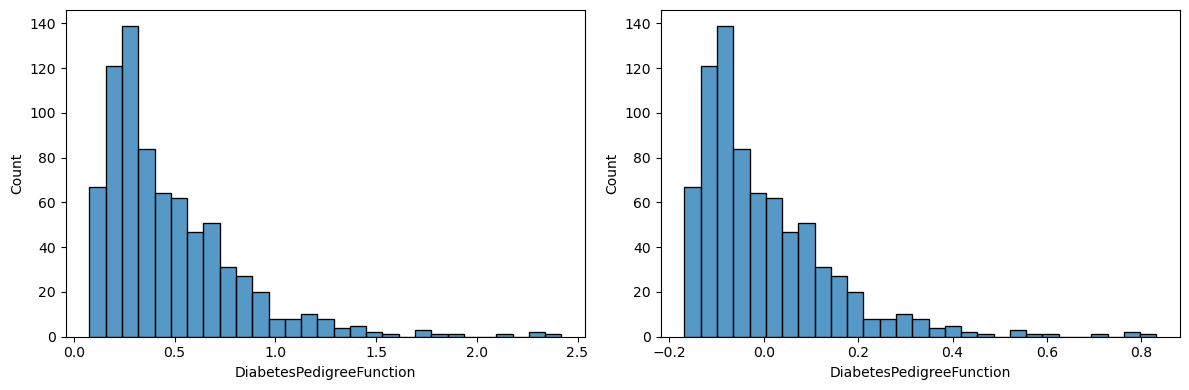

In [47]:
def mean_normalization(df_column):
    return ((df_column - df_column.mean()) / (df_column.max() - df_column.min()))


diaPediFun = mean_normalization(df['DiabetesPedigreeFunction'])


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['DiabetesPedigreeFunction'], ax=axes[0])

sns.histplot(diaPediFun, ax=axes[1])

plt.tight_layout() 
plt.show()

# Softmax Scaling
### Que es?
Softmax Scaling se bada en la función Softmax, que convierte un conjunto de valores en probabilidades (valores entre 0 y 1) manteniendo las proporciones

### Formula
<img src="./softmaxscaling.svg" style="filter: invert(30%) sepia(100%) saturate(500%) hue-rotate(190deg) brightness(90%);">

### Cuando usar
 - Cuando necesitas probabilidades (ej: clasificacion)
 - Cuando quieres resaltar diferencias entre valores grandes y pequenos
 - Para modelos de ML que esperan valores entre 0 y 1 (redes neuronales)

### Cuando **no** usar
 - Si solo quieres normalizar datos sin convertirlos en probabilidades (Min-Max)
 - Si hay valores muy grandes, ya que Softmax amplifica diferencias exponencialmente
 - Si los datos estan muy sesgados, puede hacer que valores extremos dominen la escala

### Ventajas y desventajas
#### <span style="color: green">Ventajas</span>
 - <span style="color: green">Convierte datos en probabilidades</span>
 - <span style="color: green">Util en clasificacion y redes neuronales</span>
 - <span style="color: green">Resalta diferencias entre valores</span>
#### <span style="color: crimson">Desventajas</span>
 - <span style="color: crimson">Puede amplificar diferencias demasiado si los valores son grandes</span>
 - <span style="color: crimson">No mantiene la forma de la distribucion original</span>
 - <span style="color: crimson">Puede ser menos intuitivo que Min-Max</span>

### Aplicacion
En este caso no tenemos una buena columna a la que aplicar este metodo, usaremos "Glucose" que es la columna menos sesgada

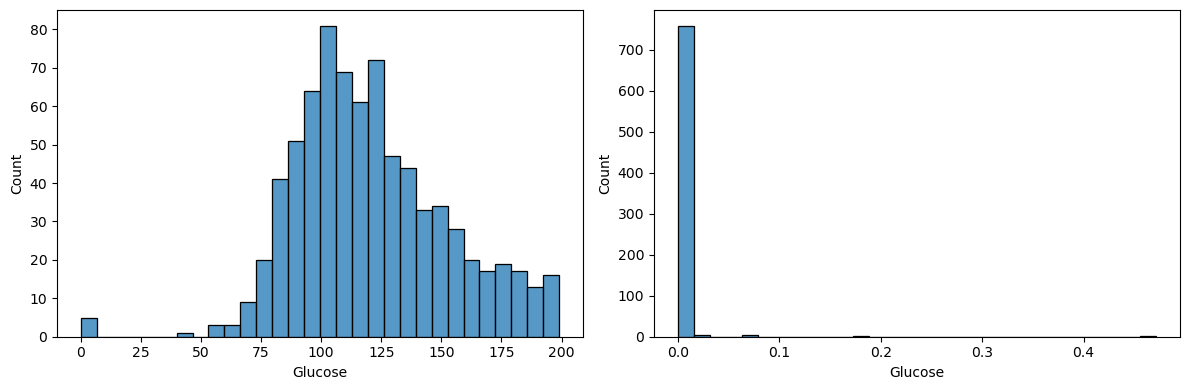

In [53]:
import numpy as np

def softmax_scaling(column):
    exp_values = np.exp(column)
    return exp_values / np.sum(exp_values)

resultado = softmax_scaling(df['Glucose'])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Glucose'], ax=axes[0], bins=30)

sns.histplot(resultado, ax=axes[1], bins=30)

plt.tight_layout()
plt.show()